# <b><u>MICROSOFT MALWARE PREDICTION</u></b>

El objetivo de este ejercicio es estimar la probabilidad de que una máquina con Sistema Operativo Windows se vea infectada por algún tipo de malware, en base a las distintas propiedades de la máquina.  

Desarrollar un Notebook con nuestra propuesta de modelo para resolver el problema. El Notebook debe contener todas las etapas de la ML Checklist debidamente comentadas (se valorará la claridad), y ejecutar sin problemas para obtener el modelo resultado.  

En concreto, debe realizarse la exploración de datos (se valorará el desarrollo de visualizaciones interesantes), el preprocesamiento, el modelado mediante un Decision Tree (opcionalmente, explorar otros algoritmos) y la evaluación.

## Importación de librerías necesarias.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import preprocessing

## Obtención del dataframe.

In [4]:
file_path = '/Users/orlando/Documents/02-Entregable_ms_malware_prediction/sample_mmp.csv'

df_mmp = pd.read_csv(file_path, low_memory=False index_col = 0)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1678653034.py, line 3)

In [ ]:
df_mmp = pd.read_csv('/Users/alinaoganesyan/Desktop/Master Data Science/Entregables/Trabajos/sample_mmp.csv', low_memory=False, index_col=0)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [7]:
df_mmp = pd.read_csv(r'C:\Users\Usuario\Desktop\DataScience\Material didáctico\Ejercicios\Modelo_supervisado\Entregable_MMP\sample_mmp.csv', low_memory=False, index_col=0)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Análisis univariante de datos.

### Tamaño del dataframe.

In [8]:
df_mmp.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 8427007 to 4295573
Columns: 83 entries, MachineIdentifier to HasDetections
dtypes: float64(36), int64(17), object(30)
memory usage: 320.4+ MB


### Visualización de datos.

In [9]:
df_mmp.head(3).T

,8427007,8829090,2731904
MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25
ProductName,win8defender,win8defender,win8defender
EngineVersion,1.1.15100.1,1.1.15100.1,1.1.15100.1
AppVersion,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106
AvSigVersion,1.273.1234.0,1.273.1282.0,1.273.781.0
IsBeta,0,0,0
RtpStateBitfield,7.00,7.00,7.00
IsSxsPassiveMode,0,0,0
DefaultBrowsersIdentifier,NaN,NaN,NaN
AVProductStatesIdentifier,"53,447.00","53,447.00","46,781.00"


- <b>Unnamed: 0: </b>index.  
- <b>MachineIdentifier: </b>Individual machine ID.  
- <b>ProductName: </b>Defender state information e.g. win8defender.  
- <b>EngineVersion: </b>Defender state information e.g. 1.1.12603.0.  
- <b>AppVersion: </b>Defender state information e.g. 4.9.10586.0.  
- <b>AvSigVersion: </b>Defender state information e.g. 1.217.1014.0.  
- <b>IsBeta: </b>Defender state information e.g. false.  
- <b>RtpStateBitfield: </b>RTP state: Realtime protection state (Enabled or Disabled).  
- <b>IsSxsPassiveMode: </b>active/passive mode of operation for Windows Defender. If another third party primary antivirus exists on the system, the Defender enters Passive mode. Passive mode obviously offers reduced functionality.  
- <b>DefaultBrowsersIdentifier: </b>ID for the machine's default browser.  
- <b>AVProductStatesIdentifier: </b>ID for the specific configuration of a user's antivirus software.  
- <b>AVProductsInstalled: </b>Active anti-virus of the total installed.  
- <b>AVProductsEnabled: </b>Of the installed antiviruses, those that are active.  
- <b>HasTpm: </b>True if machine has tpm.  
- <b>CountryIdentifier: </b>ID for the country the machine is located in.  
- <b>CityIdentifier: </b>ID for the city the machine is located in.  
- <b>OrganizationIdentifier: </b>ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries.  
- <b>GeoNameIdentifier: </b>ID for the geographic region a machine is located in.  
- <b>LocaleEnglishNameIdentifier: </b>English name of Locale ID of the current user.  
- <b>Platform: </b>Calculates platform name (of OS related properties and processor property).  
- <b>Processor: </b>This is the process architecture of the installed operating system.  
- <b>OsVer: </b>Version of the current operating system.  
- <b>OsBuild: </b>Build of the current operating system.  
- <b>OsSuite: </b>Product suite mask for the current operating system..  
- <b>OsPlatformSubRelease: </b>Returns the OS Platform sub.  
- <b>OsBuildLab: </b>Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109.  
- <b>SkuEdition: </b>The goal of this feature is to use the Product Type defined in the MSDN (Microsoft Developer Network) to map to a SKU (Stock Keeping Unit).  
- <b>IsProtected: </b>This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up.  
- <b>AutoSampleOptIn: </b>This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+.  
- <b>PuaMode: </b>Pua Enabled mode from the service.  
- <b>SMode: </b>This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed.  
- <b>IeVerIdentifier: </b>Retrieves which version of Internet Explorer is running on this device.  
- <b>SmartScreen: </b>This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry..  
- <b>Firewall: </b>This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service..  
- <b>UacLuaenable: </b>This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA..  
- <b>Census_MDC2FormFactor: </b>A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...).  
- <b>Census_DeviceFamily: </b>AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone.  
- <b>Census_OEMNameIdentifier: </b>NA.  
- <b>Census_OEMModelIdentifier: </b>NA.  
- <b>Census_ProcessorCoreCount: </b>Number of logical cores in the processor.  
- <b>Census_ProcessorManufacturerIdentifier: </b>NA.  
- <b>Census_ProcessorModelIdentifier: </b>NA.  
- <b>Census_ProcessorClass: </b>A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated.  
- <b>Census_PrimaryDiskTotalCapacity: </b>Amount of disk space on primary disk of the machine in MB.  
- <b>Census_PrimaryDiskTypeName: </b>Friendly name of Primary Disk Type .  
- <b>Census_SystemVolumeTotalCapacity: </b>The size of the partition that the System volume is installed on in MB.  
- <b>Census_HasOpticalDiskDrive: </b>True indicates that the machine has an optical disk drive (CD/DVD).  
- <b>Census_TotalPhysicalRAM: </b>Retrieves the physical RAM in MB.  
- <b>Census_ChassisTypeName: </b>Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx.  
- <b>Census_InternalPrimaryDiagonalDisplaySizeInInches: </b>Retrieves the physical diagonal length in inches of the primary display.  
- <b>Census_InternalPrimaryDisplayResolutionHorizontal: </b>Retrieves the number of pixels in the horizontal direction of the internal display..  
- <b>Census_InternalPrimaryDisplayResolutionVertical: </b>Retrieves the number of pixels in the vertical direction of the internal display.  
- <b>Census_PowerPlatformRoleName: </b>Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device.  
- <b>Census_InternalBatteryType: </b>NA.  
- <b>Census_InternalBatteryNumberOfCharges: </b>NA.  
- <b>Census_OSVersion: </b>Numeric OS version Example .  
- <b>Census_OSArchitecture: </b>Architecture on which the OS is based. Derived from OSVersionFull. Example .  
- <b>Census_OSBranch: </b>Branch of the OS extracted from the OsVersionFull. Example .  
- <b>Census_OSBuildNumber: </b>OS Build number extracted from the OsVersionFull. Example .  
- <b>Census_OSBuildRevision: </b>OS Build revision extracted from the OsVersionFull. Example .  
- <b>Census_OSEdition: </b>Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise.  
- <b>Census_OSSkuName: </b>OS edition friendly name (currently Windows only).  
- <b>Census_OSInstallTypeName: </b>Friendly description of what install was used on the machine i.e. clean.  
- <b>Census_OSInstallLanguageIdentifier: </b>NA.  
- <b>Census_OSUILocaleIdentifier: </b>NA.  
- <b>Census_OSWUAutoUpdateOptionsName: </b>Friendly name of the WindowsUpdate auto.  
- <b>Census_IsPortableOperatingSystem: </b>Indicates whether OS is booted up and running via Windows.  
- <b>Census_GenuineStateName: </b>Friendly name of OSGenuineStateID. 0 = Genuine.  
- <b>Census_ActivationChannel: </b>Retail license key or Volume license key for a machine..  
- <b>Census_IsFlightingInternal: </b>Flighting' in Windows Defender context means making new development features available as soon as possible, during the development cycle. This does not refer to a public release. The 'internal' most likely means the Window Insider community.  
- <b>Census_IsFlightsDisabled: </b>Indicates if the machine is participating in flighting..  
- <b>Census_FlightRing: </b>The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring..  
- <b>Census_ThresholdOptIn: </b>NA.  
- <b>Census_FirmwareManufacturerIdentifier: </b>NA.  
- <b>Census_FirmwareVersionIdentifier: </b>NA.  
- <b>Census_IsSecureBootEnabled: </b>Indicates if Secure Boot mode is enabled. Secure Boot is a security measure to protect against malware during early system startup..  
- <b>Census_IsWIMBootEnabled: </b>wimboot is a boot loader for Windows Imaging Format .wim files. It enables you to boot into a Windows PE (WinPE) deployment or recovery environment..  
- <b>Census_IsVirtualDevice: </b>Identifies a Virtual Machine (machine learning model).  
- <b>Census_IsTouchEnabled: </b>Is this a touch device ?.  
- <b>Census_IsPenCapable: </b>Is the device capable of pen input ?.  
- <b>Census_IsAlwaysOnAlwaysConnectedCapable: </b>Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected.  
- <b>Wdft_IsGamer: </b>Indicates whether the device is a gamer device or not based on its hardware combination..  
- <b>Wdft_RegionIdentifier: </b>Region id code.  
- <b>HasDetections: </b>indicates that Malware was detected on the machine.  

### Tipo de atributos disponibles.

In [10]:
df_mmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 8427007 to 4295573
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   IsBeta                                             500000 non-null  int64  
 6   RtpStateBitfield                                   498168 non-null  float64
 7   IsSxsPassiveMode                                   500000 non-null  int64  
 8   DefaultBrowsersIdentifier                          24061 non-null   floa

### Estadísticos descriptivos.

In [11]:
df_mmp.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,"500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00
RtpStateBitfield,"498,168.00",6.85,1.02,0.00,7.00,7.00,7.00,35.00
IsSxsPassiveMode,"500,000.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
DefaultBrowsersIdentifier,"24,061.00","1,652.82","1,004.75",1.00,788.00,"1,632.00","2,381.00","3,209.00"
AVProductStatesIdentifier,"498,062.00","47,850.91","14,023.09",3.00,"49,480.00","53,447.00","53,447.00","70,492.00"
AVProductsInstalled,"498,062.00",1.33,0.52,1.00,1.00,1.00,2.00,5.00
AVProductsEnabled,"498,062.00",1.02,0.17,0.00,1.00,1.00,1.00,4.00
HasTpm,"500,000.00",0.99,0.11,0.00,1.00,1.00,1.00,1.00
CountryIdentifier,"500,000.00",108.04,63.07,1.00,51.00,97.00,162.00,222.00
CityIdentifier,"481,760.00","81,271.65","48,985.13",7.00,"36,825.00","82,373.00","123,939.50","167,958.00"


Importante: nuestro target HasDetections tiene un mean de 0.50, lo que quiere decir que en el 50% de los casos, se ha detectado malware

In [12]:
df_mmp.describe(include=['object']).T

,count,unique,top,freq
MachineIdentifier,500000,500000,f1cd864e97bae82bdf96523e1a539121,1
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436


### Número de valores nulos.

#### Las variables numéricas con nulos se imputaran de forma diferencial a los categóricos. Numéricos con valores extremos y categóricas con etiquetas, ya que el modelo nos permitirá agrupar según esos valores en paquetes clasificadores.

In [13]:
df_mmp.select_dtypes(include=['number']).isnull().sum()

IsBeta                                                    0
RtpStateBitfield                                       1832
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            475939
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
AutoSampleOptIn                         

In [14]:
df_mmp.select_dtypes(include=['object']).isnull().sum()

MachineIdentifier                        0
ProductName                              0
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Platform                                 0
Processor                                0
OsVer                                    0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
PuaMode                             499874
SmartScreen                         178596
Census_MDC2FormFactor                    0
Census_DeviceFamily                      0
Census_ProcessorClass               497918
Census_PrimaryDiskTypeName             709
Census_ChassisTypeName                  37
Census_PowerPlatformRoleName             2
Census_InternalBatteryType          355603
Census_OSVersion                         0
Census_OSArchitecture                    0
Census_OSBranch                          0
Census_OSEd

### Distribución de los valores del target.

In [15]:
df_mmp['HasDetections'].value_counts(dropna=False)

HasDetections
0    250047
1    249953
Name: count, dtype: int64

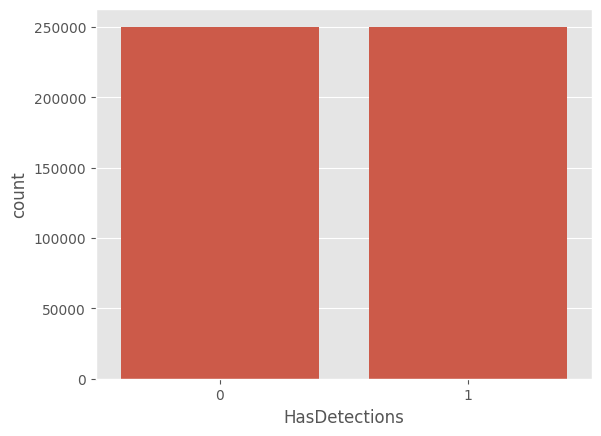

In [16]:
sns.countplot(data=df_mmp, x='HasDetections');

Los registros del target están balanceados.

### Distribución de variables y correlación con el target.

Hacemos una visualización de las columnas por cada tipo de dato para visualizar mejor qué tipo de datos tenemos

In [17]:
pd.set_option('display.max_colwidth', None)

df_dtypes = df_mmp.columns.groupby(df_mmp.dtypes)
df_dtypes = pd.DataFrame({
    'dtype':     list(df_dtypes.keys()),
    'num columnas': [len(df_dtypes[key])  for key in df_dtypes.keys()],
    'nombre columnas':   [list(df_dtypes[key]) for key in df_dtypes.keys()],
})
df_dtypes = df_dtypes.style.map(lambda x:'text-align: left')
df_dtypes



,dtype,num columnas,nombre columnas
0,int64,17,"['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'AutoSampleOptIn', 'Census_HasOpticalDiskDrive', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier', 'Census_IsPortableOperatingSystem', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'HasDetections']"
1,float64,36,"['RtpStateBitfield', 'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'IsProtected', 'SMode', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSInstallLanguageIdentifier', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_ThresholdOptIn', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_IsWIMBootEnabled', 'Census_IsVirtualDevice', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'Wdft_RegionIdentifier']"
2,object,30,"['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']"


Nos quedamos con las columnas categóricas y numéricas en listas distintas para poder analizarlas por separado

In [18]:
object_columns = []
numeric_columns = []

for col in df_mmp:
      if (df_mmp[col].dtype.kind =="f" or df_mmp[col].dtype.kind=="i"):
              numeric_columns.append(col)
      elif ((df_mmp[col].dtype.kind=="O") & (col != 'MachineIdentifier')): #dejamos fuera MachineIdentifier hasta decidir qué hacer con esta variable. Consume mucha memoria al ser 500.000 valores únicos
                  object_columns.append(col)


Analizamos cada variable categórica para entender su distribución y su relación con el target 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10984\1648272576.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[17,3])


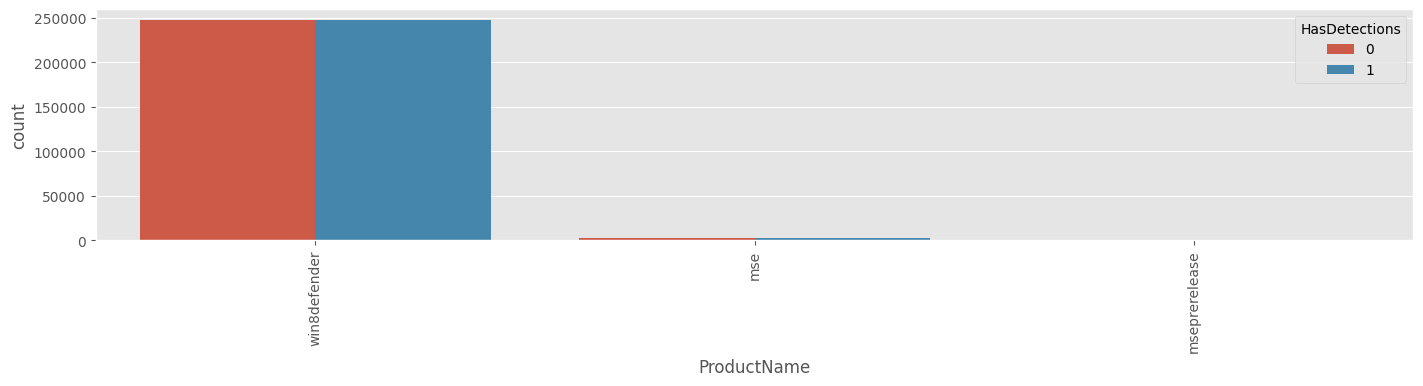

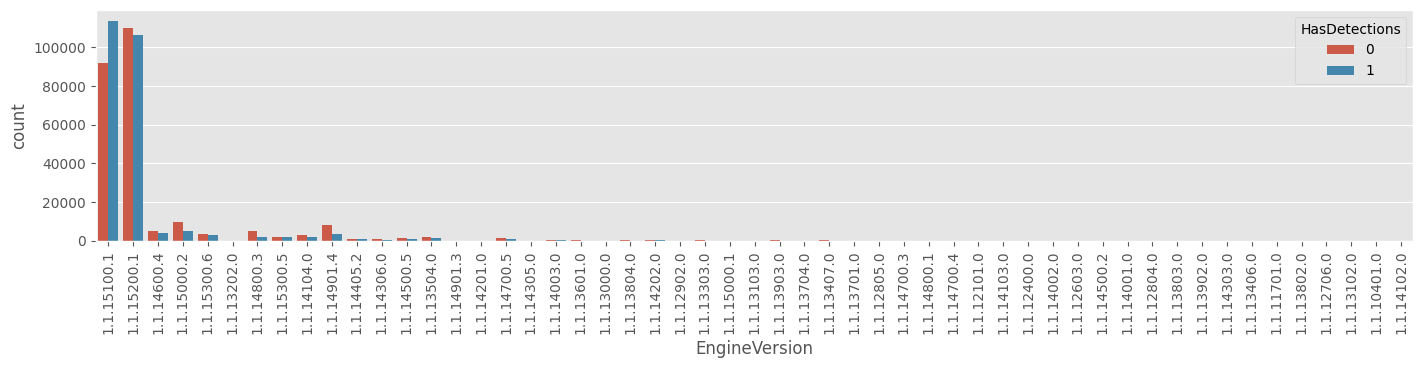

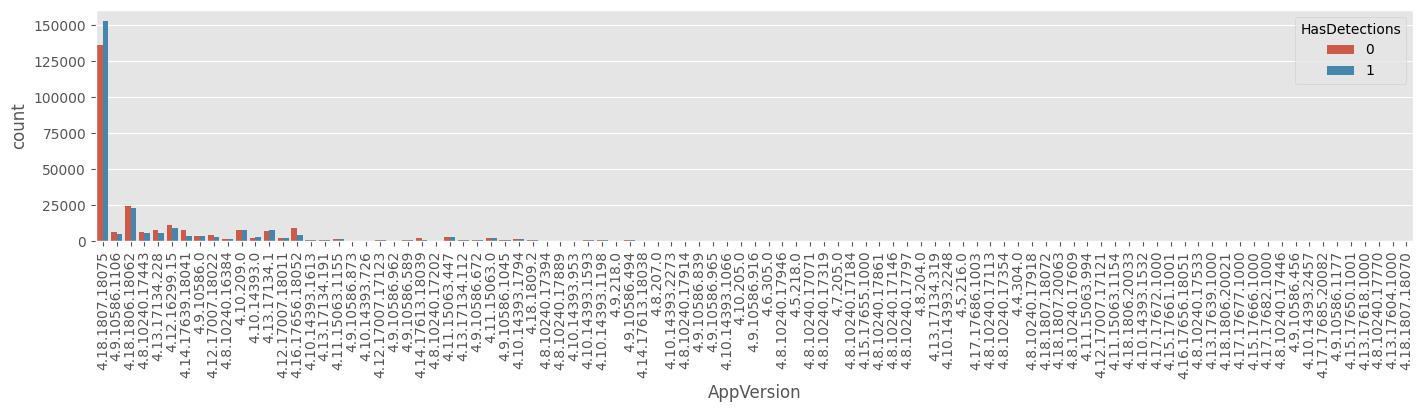

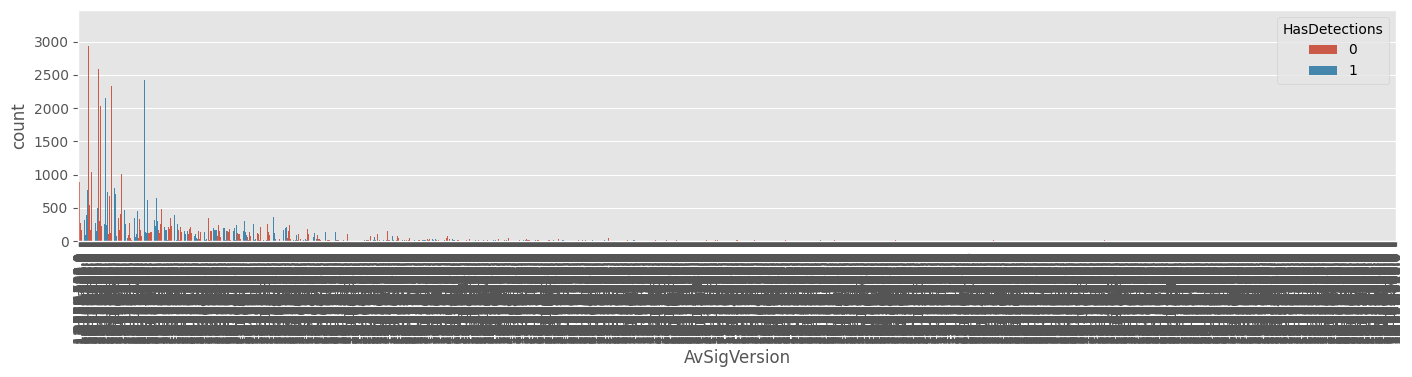

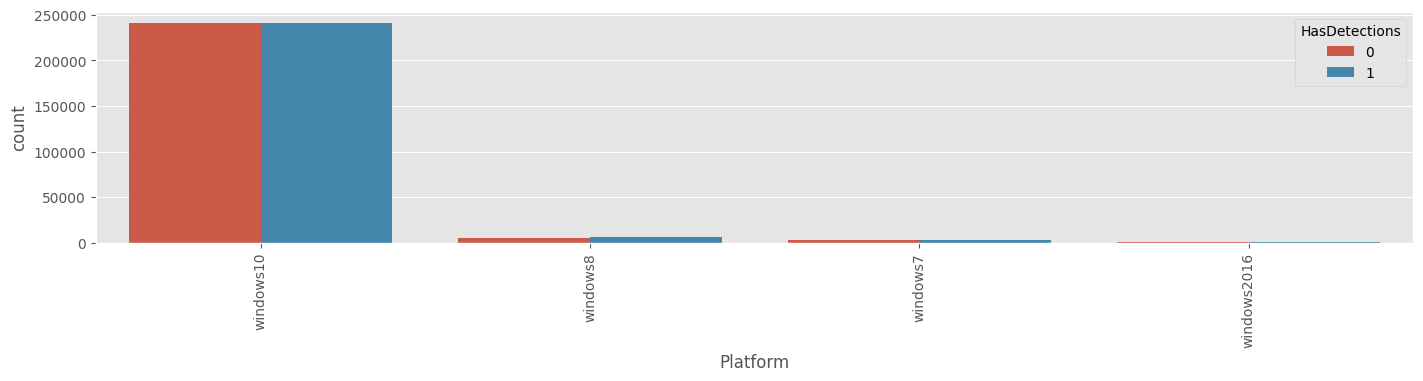

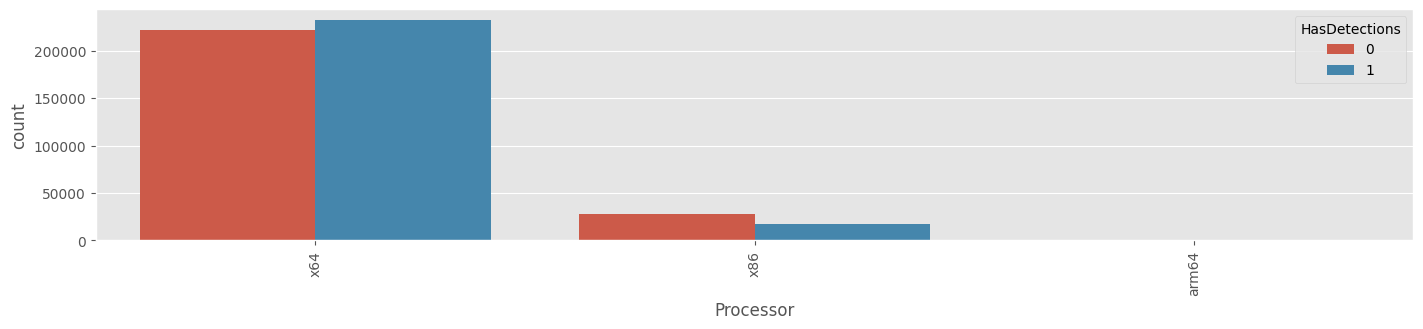

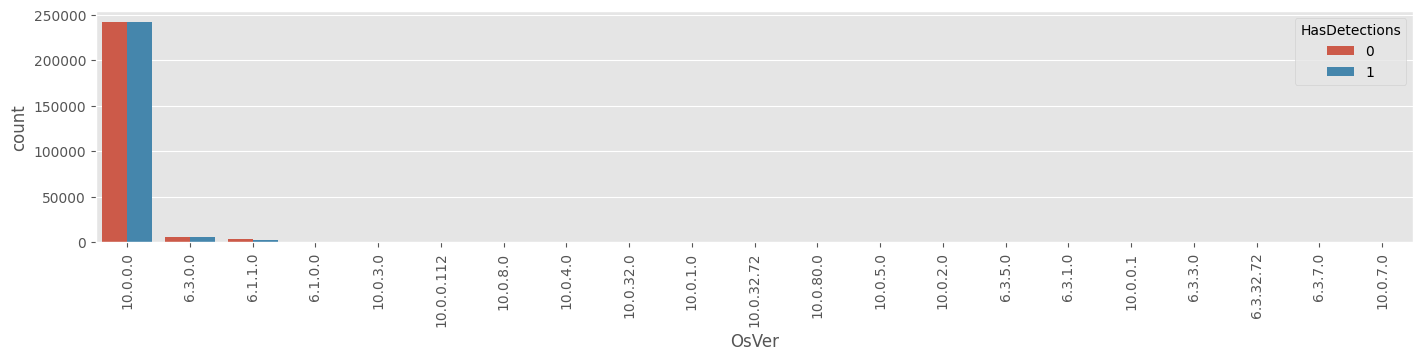

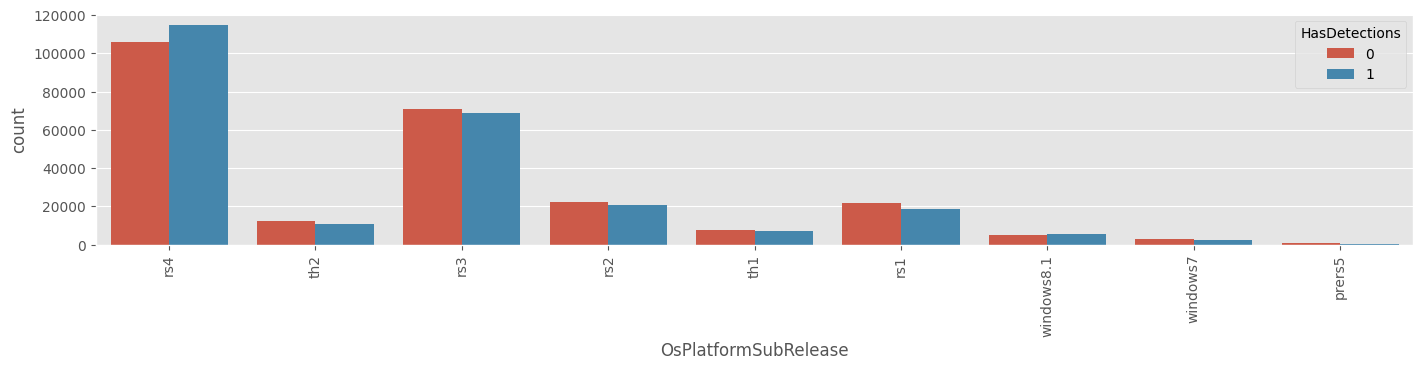

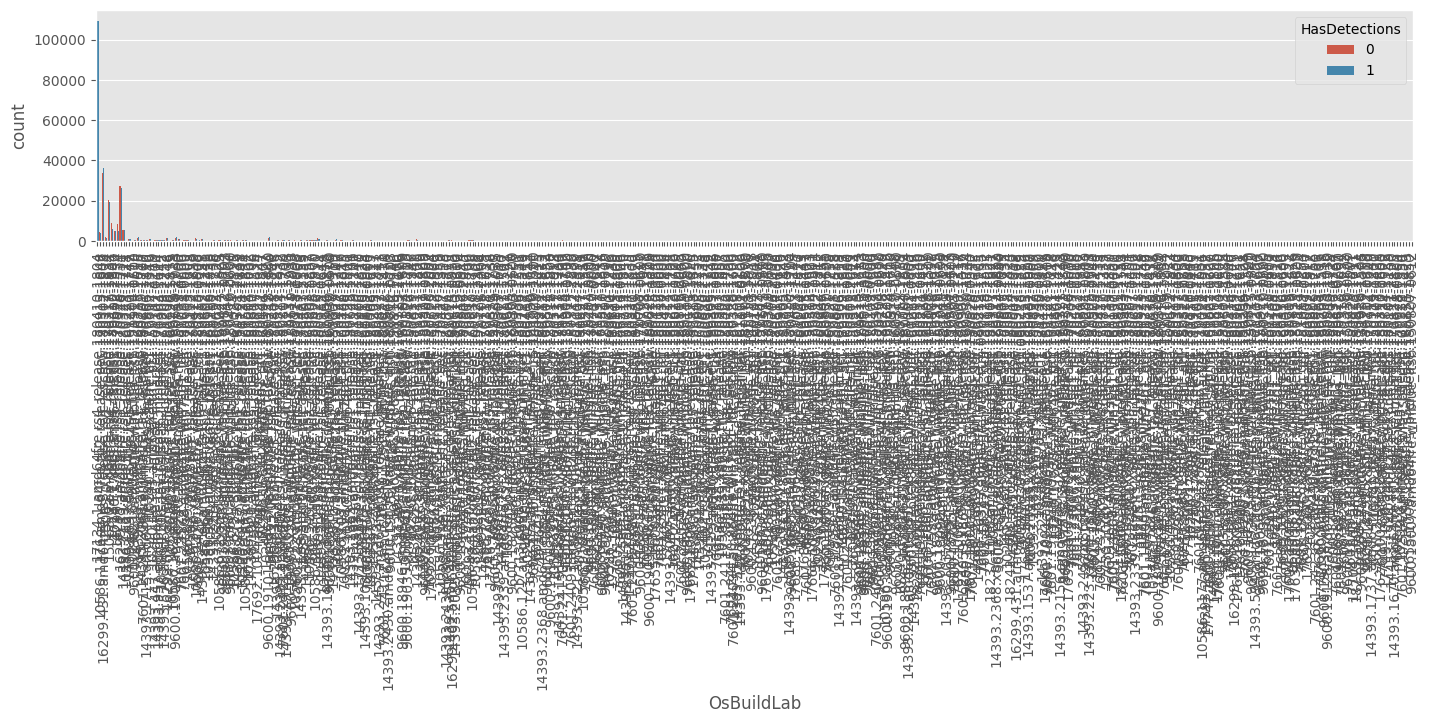

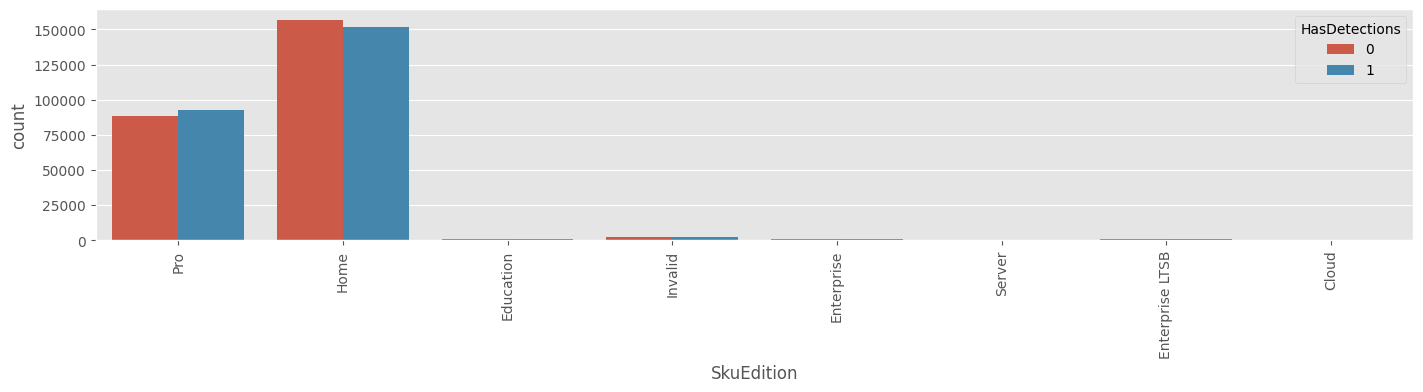

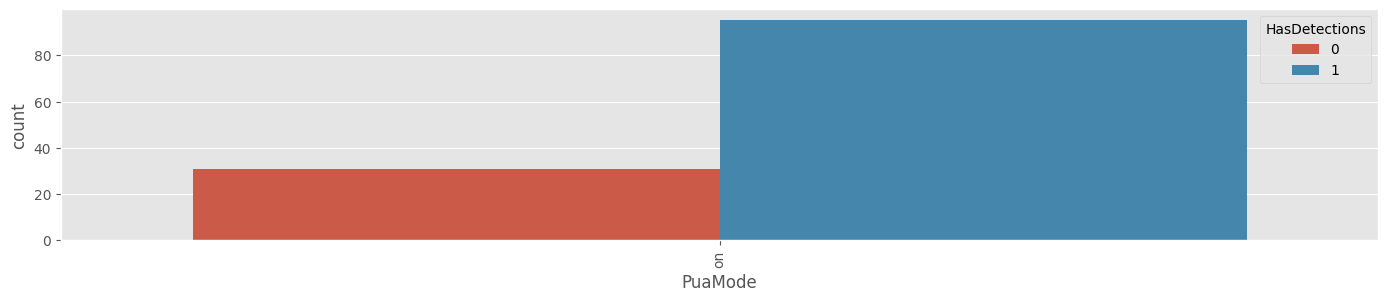

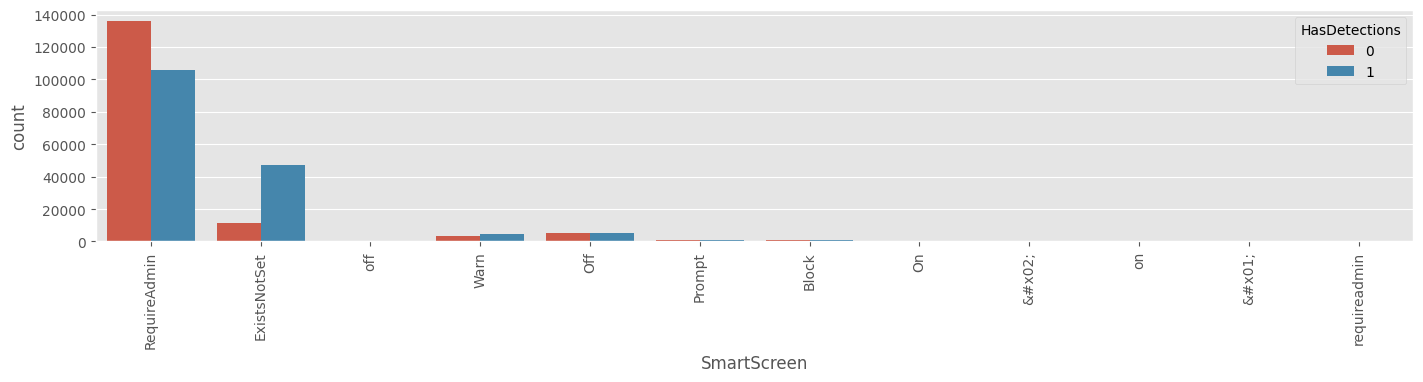

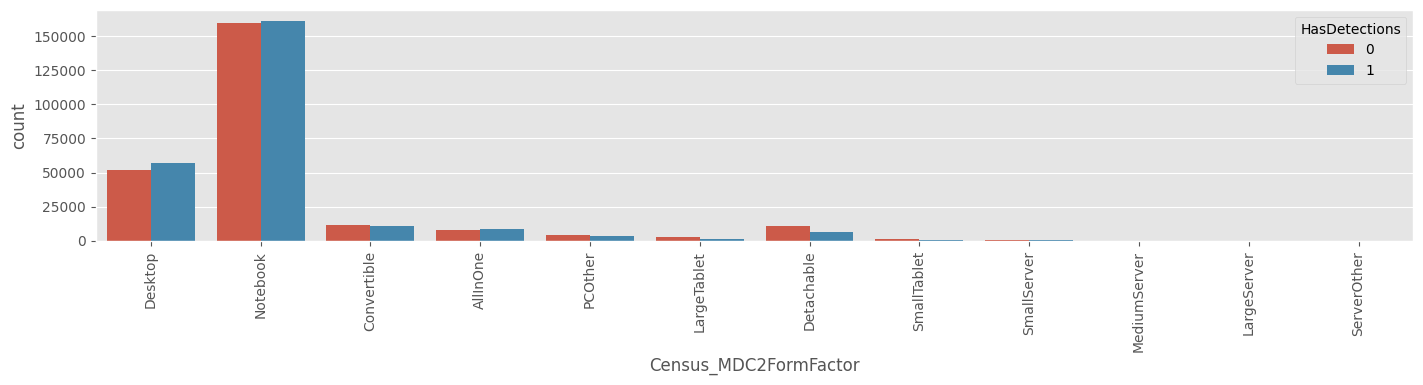

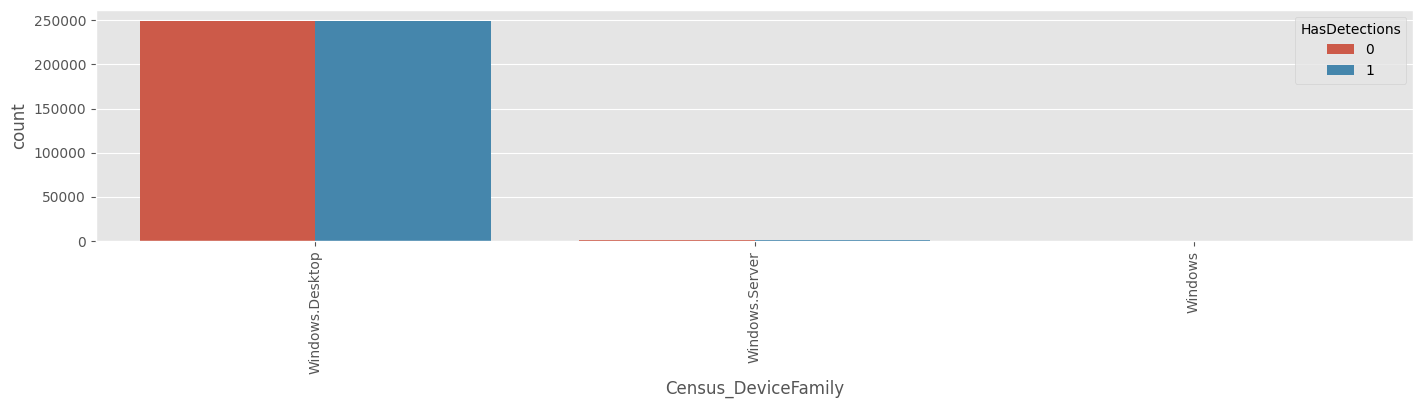

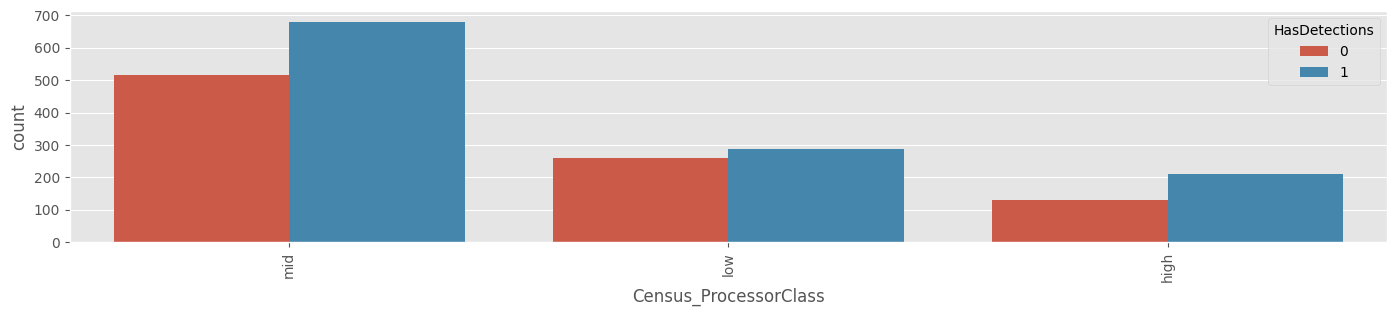

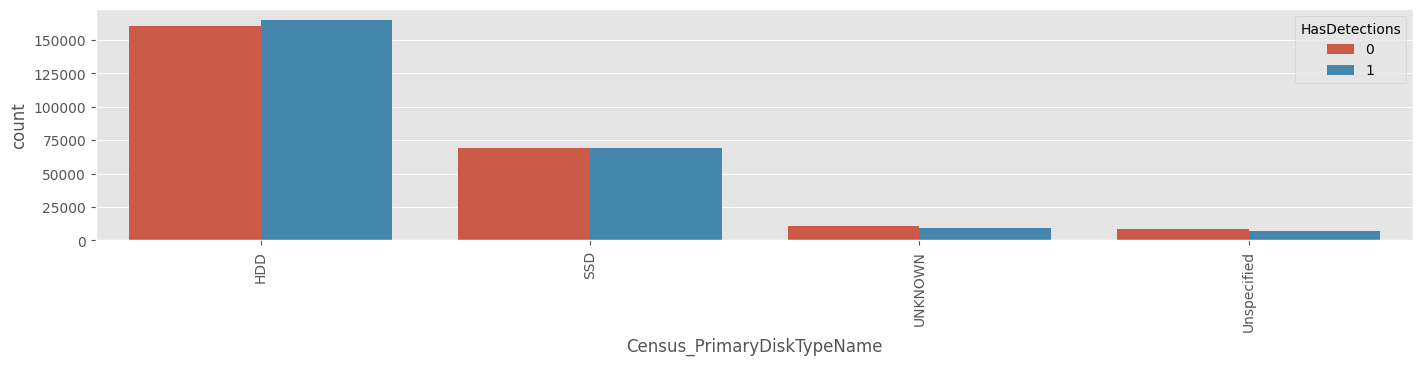

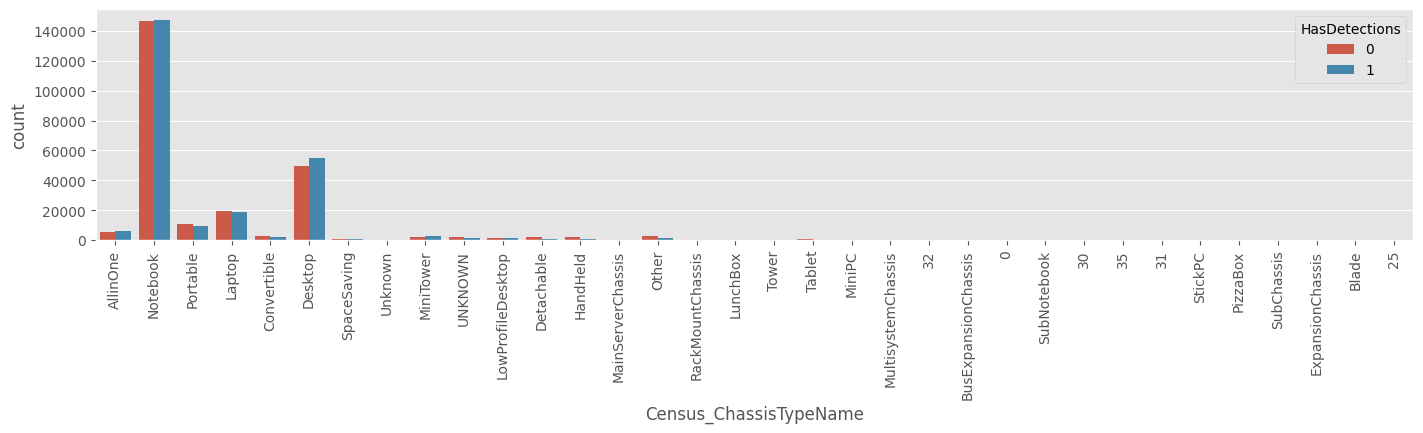

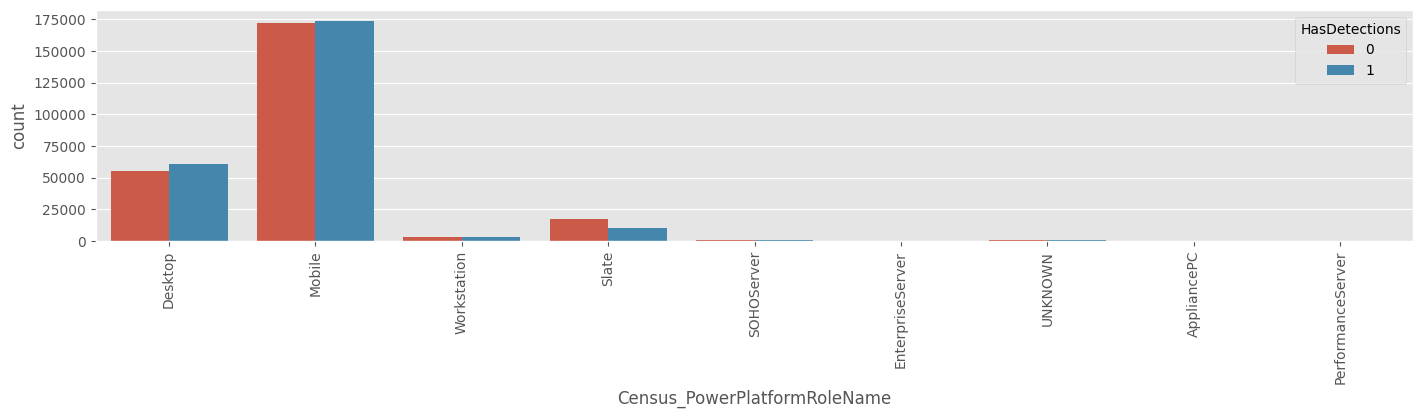

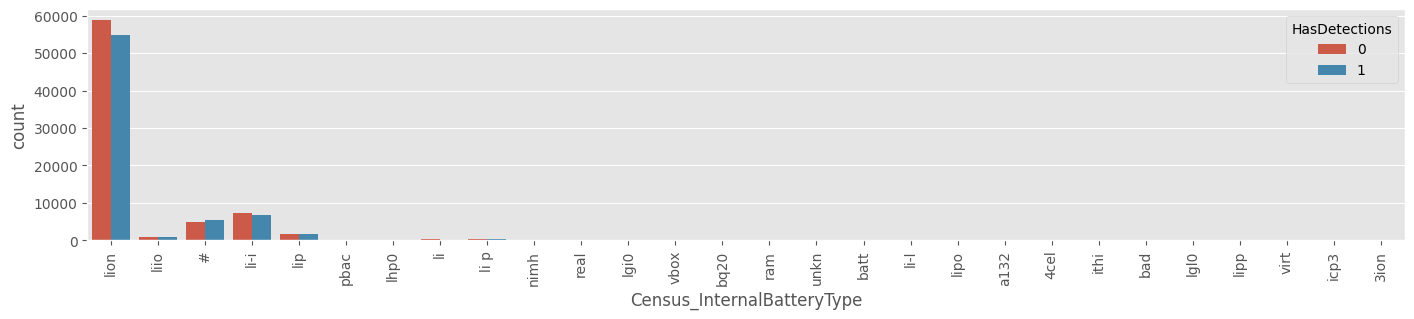

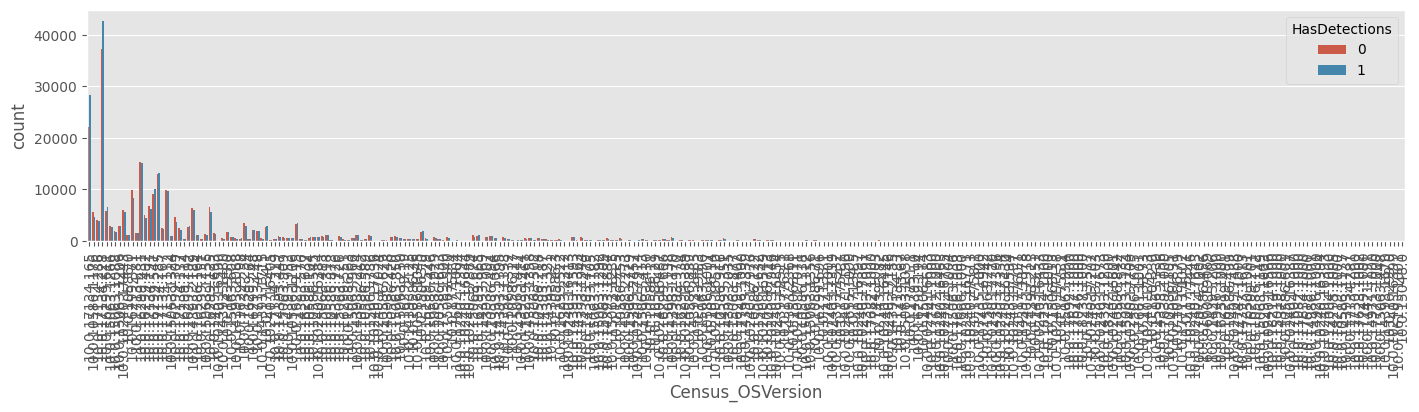

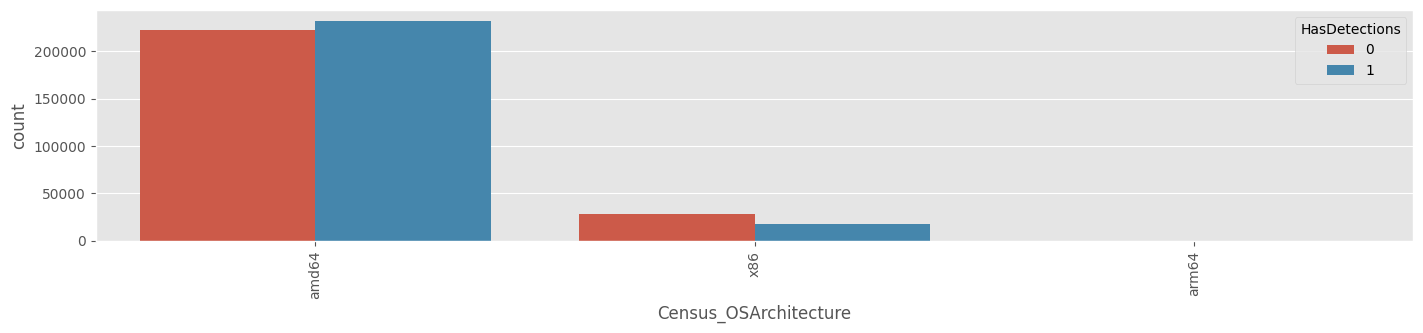

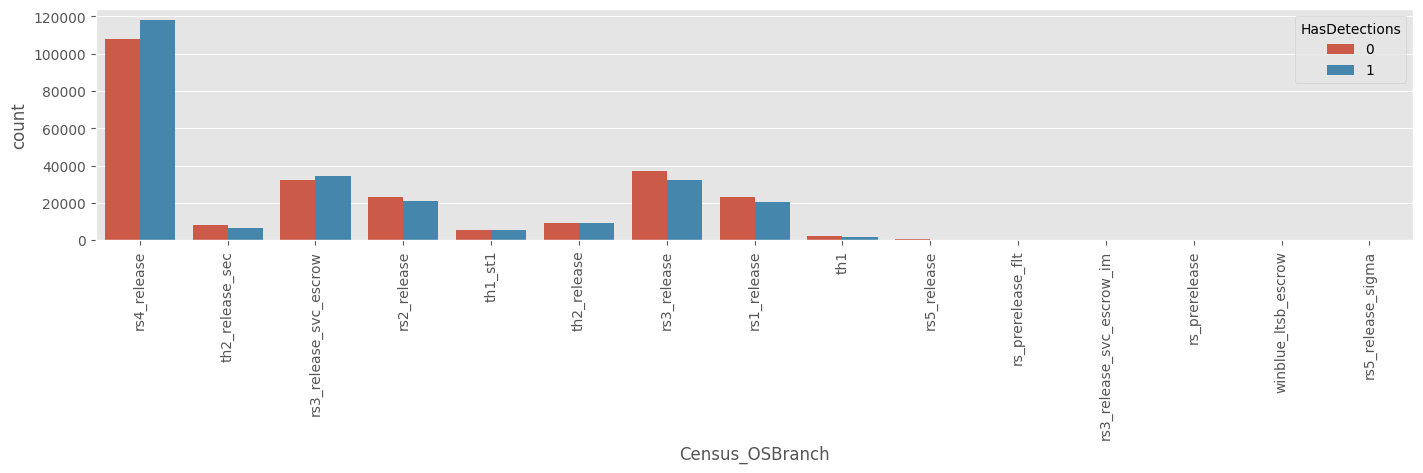

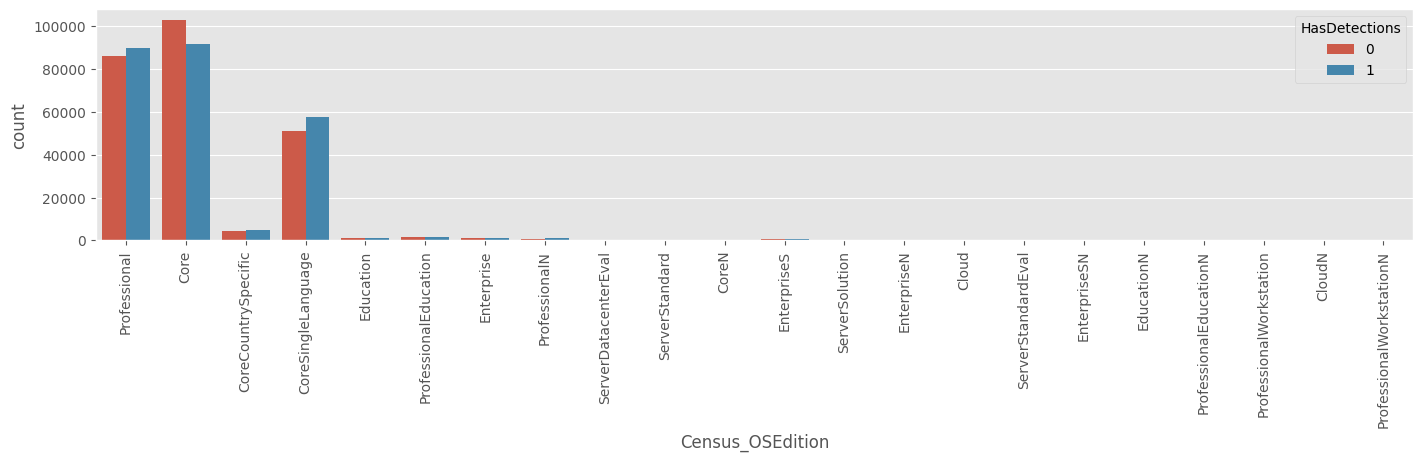

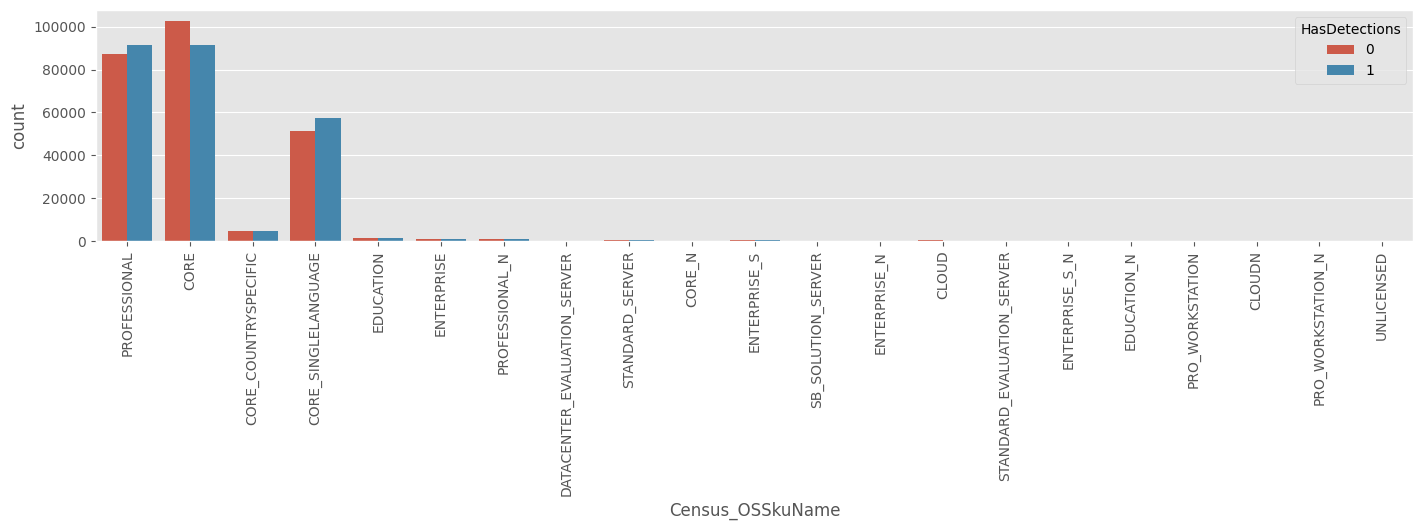

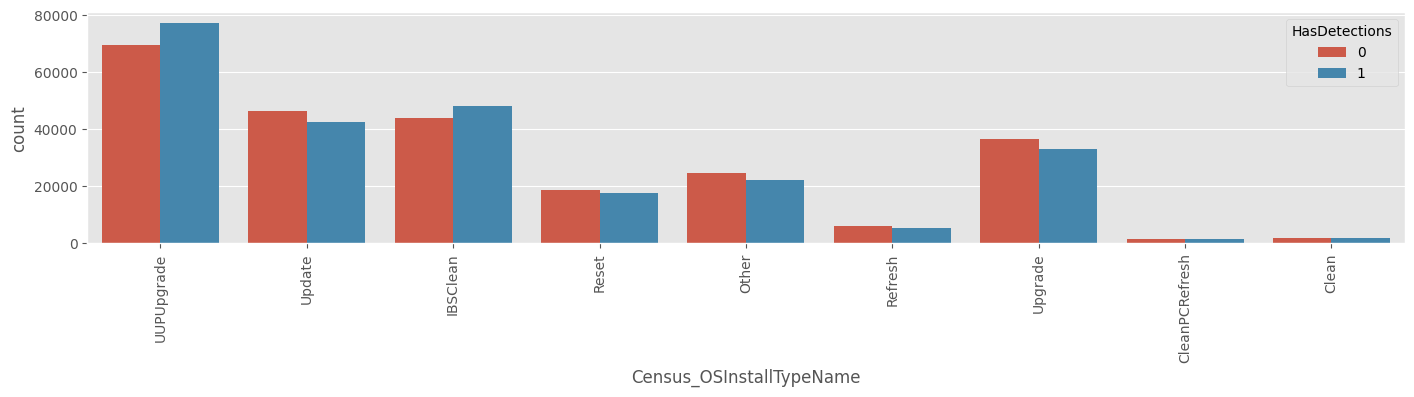

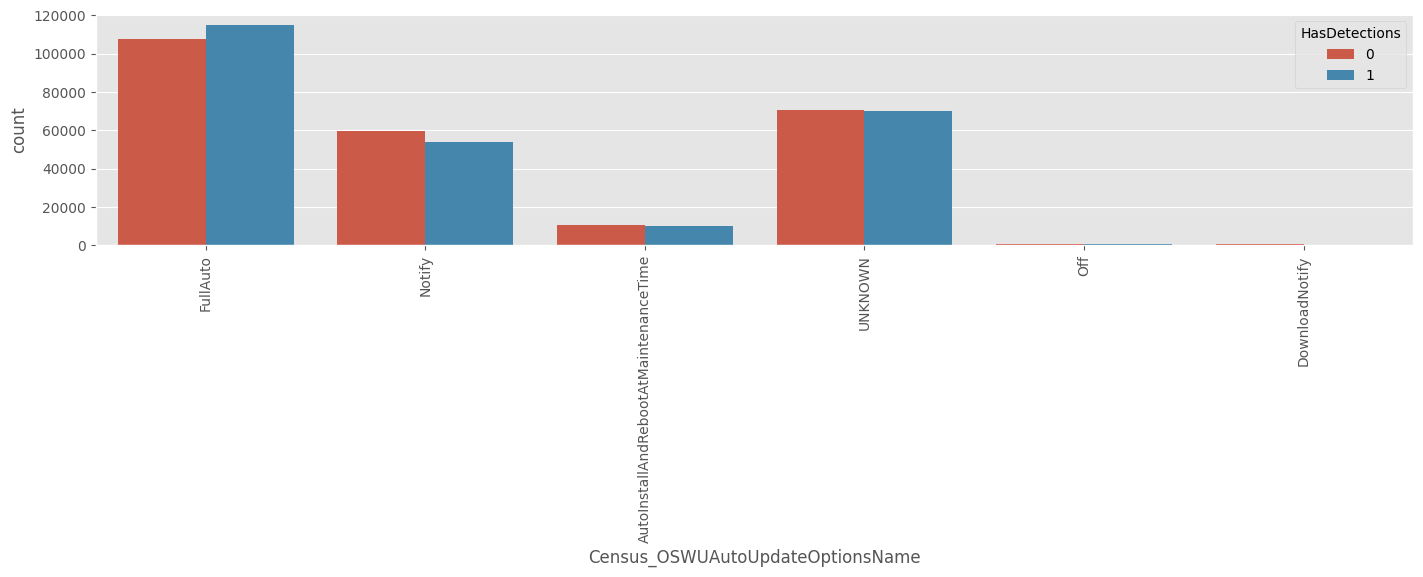

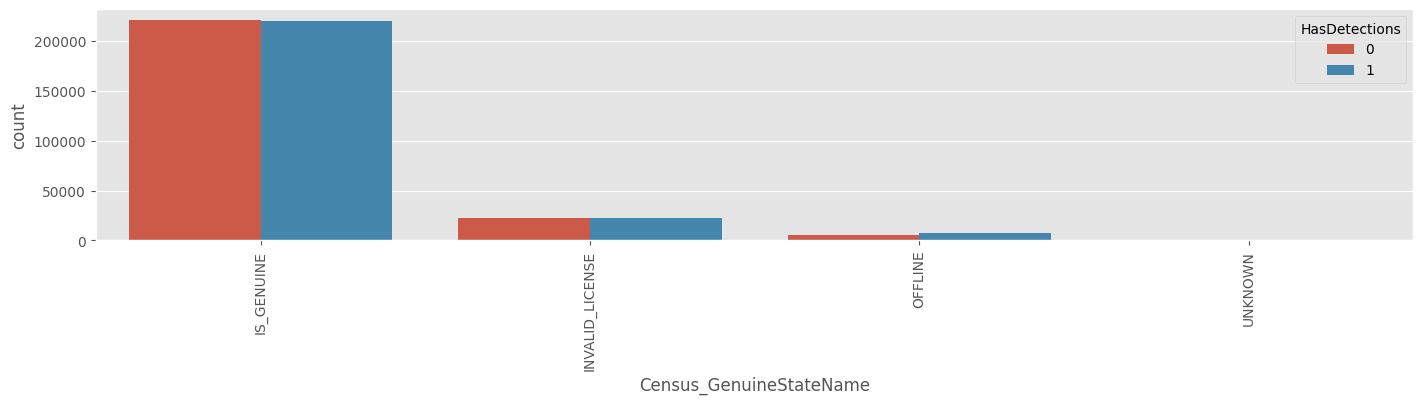

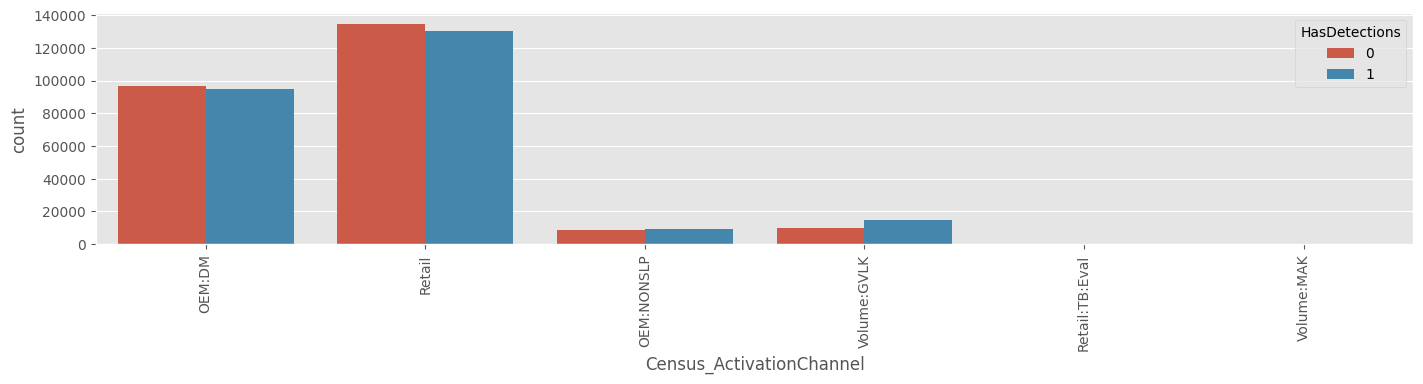

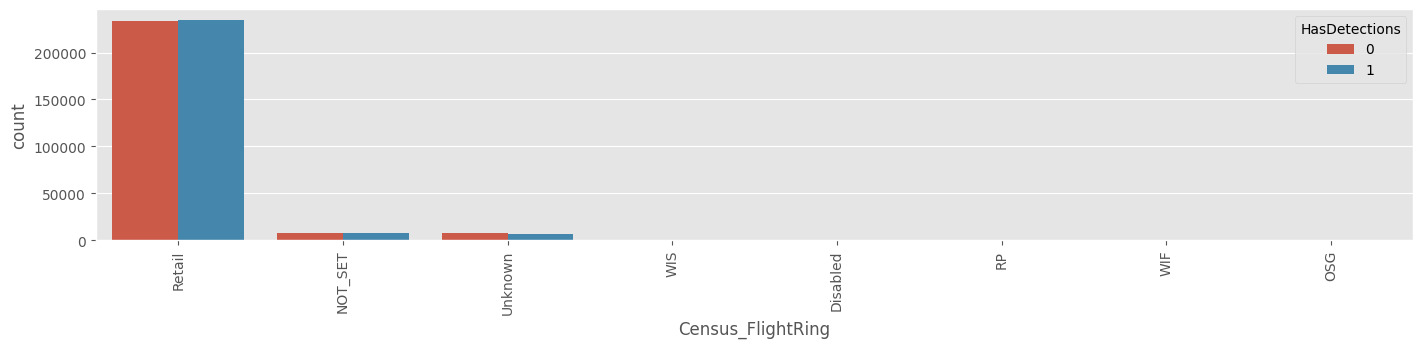

In [19]:
# [AO] Consume mucha memoria hacer esto, habrá que ver si hay formas de optimizarlo
for col in object_columns:
    plt.figure(figsize=[17,3])
    plt.xticks(rotation=90)
    sns.countplot(data=df_mmp, x=col, hue='HasDetections')

[AO] Hacer distribución con columnas con pivot_table

[AO] Poner aquí conclusiones sobre cada variable cuando sepamos qué haremos con ella

Eliminamos aquellas variables con menos de un 2% de valores non-null, aquellos que son booleanos y que tienen menos de 2% de valores de una categoría y aquellas que compartan una correlación superior a 0,9 con otra variable. También eliminamos 'MachineIdentifier' ya que tiene un único valor.

Hacemos un análisis inicial de la correlación de las variables numéricas para saber si de entrada debemos descartar alguna de ellas

In [20]:
corr = df_mmp.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
IsBeta,1.000000,0.000213,-0.000187,nan,-0.002033,-0.000885,-0.000176,-0.012734,0.000941,0.000753,nan,0.000353,0.000804,-0.005251,0.001101,0.000339,-0.000007,-0.000031,0.006900,nan,-0.000002,-0.000014,0.000209,-0.001365,0.000518,0.001510,-0.001055,-0.000628,-0.000409,-0.000582,nan,nan,nan,-0.000856,-0.003793,-0.000389,-0.000919,-0.000925,-0.000032,nan,nan,-0.000038,0.000628,-0.001194,-0.001374,nan,-0.000119,-0.000536,-0.000280,-0.000350,-0.000906,0.002248,-0.001414
RtpStateBitfield,0.000213,1.000000,-0.885639,-0.004962,0.105237,-0.183095,0.009346,-0.007860,0.011350,-0.001190,0.004990,0.018069,0.006882,-0.027464,-0.011023,0.060631,-0.012158,0.002226,-0.023449,0.006215,0.000213,0.003448,0.000081,-0.018380,0.003625,-0.005396,-0.026347,-0.019181,-0.010053,-0.023076,-0.012444,-0.016916,-0.010796,-0.005590,-0.033989,0.024159,-0.014009,-0.013738,-0.000159,0.000735,0.000570,-0.002449,0.009963,0.005886,-0.016266,nan,0.008394,0.009711,0.006366,0.020115,-0.024648,-0.001504,0.040304
IsSxsPassiveMode,-0.000187,-0.885639,1.000000,0.012028,-0.110956,0.194294,0.027948,0.013870,-0.011686,0.000591,-0.004700,-0.018672,-0.012320,0.045279,0.016242,-0.033295,-0.000701,-0.002769,-0.004239,-0.000927,-0.000187,-0.004793,0.000010,0.023228,0.000769,0.008502,0.021589,0.016353,0.010481,0.026987,0.009528,0.022267,0.015532,0.001066,0.043867,-0.023590,0.011113,0.010585,-0.001009,-0.000611,-0.000504,0.000790,-0.010323,-0.007070,0.020660,nan,-0.010625,-0.005630,-0.003095,-0.015879,0.031757,0.001163,-0.034038
DefaultBrowsersIdentifier,nan,-0.004962,0.012028,1.000000,0.004171,-0.002898,-0.003407,-0.013139,-0.001054,0.002879,0.005629,-0.020074,0.035982,-0.044086,0.057070,0.019045,0.002627,nan,-0.057355,0.014369,0.005758,-0.030262,-0.022665,0.001428,-0.012479,-0.010970,0.038187,0.058940,-0.024088,0.014567,-0.023323,0.008975,0.002951,-0.054322,-0.048266,-0.020446,0.003371,0.002013,-0.001326,nan,nan,nan,0.010240,0.029571,0.069342,nan,-0.018352,0.011398,0.005897,-0.000176,0.010875,0.019271,0.000956
AVProductStatesIdentifier,-0.002033,0.105237,-0.110956,0.004171,1.000000,-0.631974,-0.124388,0.141697,0.006808,-0.004896,0.010980,0.019346,-0.080393,0.002206,-0.058716,-0.145386,-0.003938,0.008210,-0.072192,0.000621,0.000566,0.012875,0.015949,0.056853,0.030708,0.021526,-0.073844,-0.087962,-0.051213,0.038034,0.003237,0.049058,0.061876,0.021416,-0.020895,0.025979,0.019178,0.017677,0.002228,0.002088,0.001493,0.005335,-0.011726,-0.016692,-0.033410,nan,0.029366,0.040902,0.034613,0.063479,-0.022680,-0.019618,0.116163
AVProductsInstalled,-0.000885,-0.183095,0.194294,-0.002898,-0.631974,1.000000,0.285393,0.023991,-0.023788,0.006300,-0.013779,-0.051085,0.042386,0.006207,0.180917,-0.024436,0.005377,-0.012592,-0.030873,-0.002352,-0.000886,-

Vemos correlaciónes altas entre OSBuild y Census_OSBuildNumber (0.93) Veremos la distribución de ambas con el targert para elegir con cuál nos conviene quedarnos. 
Por otro lado vemos correlación alta (0.98) entre Census_OSUILocaleIdentifier y Census_OSInstallLanguageIdentifier. Al haber nulos en la columna Census_OSInstallLanguageIdentifier, nos quedaremos con Census_OSUILocaleIdentifier.

Miramos distribución con el Target de OsBuild y Census_OSBuildNumber con un violinplot

<Axes: xlabel='HasDetections', ylabel='OsBuild'>

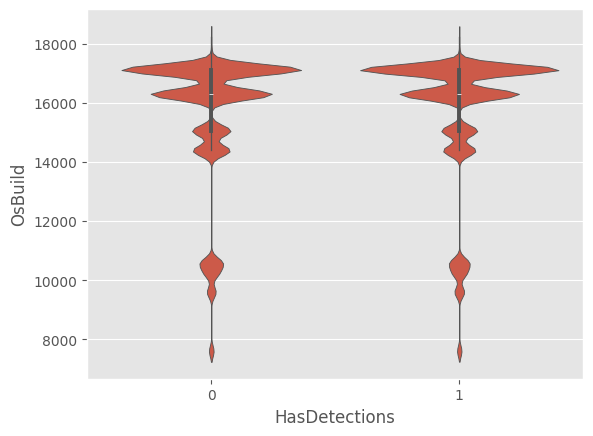

In [21]:
sns.violinplot(data=df_mmp, x='HasDetections', y='OsBuild')

<Axes: xlabel='HasDetections', ylabel='Census_OSBuildNumber'>

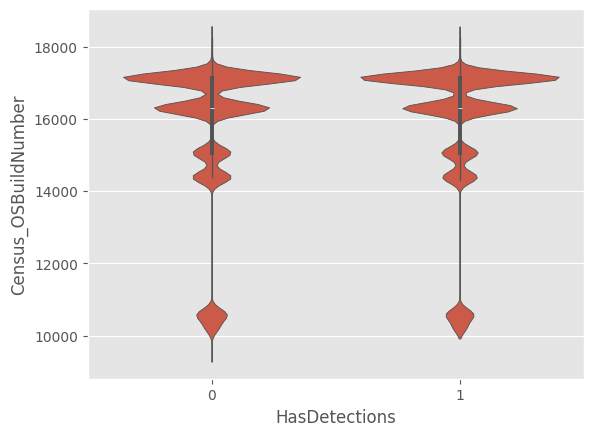

In [22]:
sns.violinplot(data=df_mmp, x='HasDetections', y='Census_OSBuildNumber')

 Decidimos quedarnos con OsBuild después de hacer la distribución con el target, vemos que la cantidad de registros por cada valor del target  se distribuye más uniformemente en la aplitud de OsBuild.
 Haremos la eliminación en la siguiente fase del checklist.

Hacemos un for para generar violinplot de todas las variables numéricas respecto al target. 

In [23]:
#for col in numeric_columns:
    #plt.figure() 
    #sns.violinplot(data=df_mmp, x='HasDetections', y=col)
    #plt.show() 
    #print(df_mmp[col].value_counts(dropna = False))


## Eliminación de columnas de bajo valor


In [26]:
non_variance_features = ['Census_OSBuildNumber','MachineIdentifier','SMode','AutoSampleOptIn','LocaleEnglishNameIdentifier','AppVersion','AvSigVersion','IsBeta','DefaultBrowsersIdentifier','CountryIdentifier','CityIdentifier','PuaMode','Census_ProcessorClass', 'Census_OSInstallLanguageIdentifier', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_IsWIMBootEnabled' ]

df_mmp.drop(non_variance_features, axis=1, inplace=True)

KeyError: "['AppVersion', 'AvSigVersion', 'IsBeta', 'DefaultBrowsersIdentifier', 'CountryIdentifier', 'CityIdentifier', 'PuaMode', 'Census_ProcessorClass', 'Census_OSInstallLanguageIdentifier', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_IsWIMBootEnabled'] not found in axis"

## Numéricas a categóricas

Transformamos aquellas variables numéricas que se refieren a una etiqueta, a categóricas. Para ello, primero creamos la lista con las variables y después aplicamos la conversión a objeto.

In [39]:
var_num_falsas = ['RtpStateBitfield','AVProductStatesIdentifier','AVProductsInstalled', 'AVProductsEnabled', 'OrganizationIdentifier', 'GeoNameIdentifier', 'OsSuite', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_OSUILocaleIdentifier',  'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Wdft_RegionIdentifier']

In [40]:
for col in var_num_falsas:
    df_mmp[col] = df_mmp[col].astype(object)

In [41]:
df_mmp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 8427007 to 4295573
Data columns (total 67 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   RtpStateBitfield                                   498168 non-null  object 
 3   IsSxsPassiveMode                                   500000 non-null  int64  
 4   AVProductStatesIdentifier                          498062 non-null  object 
 5   AVProductsInstalled                                498062 non-null  object 
 6   AVProductsEnabled                                  498062 non-null  object 
 7   HasTpm                                             500000 non-null  int64  
 8   OrganizationIdentifier                             345437 non-null  obje

## Imputación de nulos

### Categóricas

In [37]:
df_mmp.select_dtypes(include=['object']).isnull().sum()

MachineIdentifier                              0
ProductName                                    0
EngineVersion                                  0
RtpStateBitfield                            1832
AVProductStatesIdentifier                   1938
AVProductsInstalled                         1938
AVProductsEnabled                           1938
OrganizationIdentifier                    154563
GeoNameIdentifier                             16
Platform                                       0
Processor                                      0
OsVer                                          0
OsSuite                                        0
OsPlatformSubRelease                           0
OsBuildLab                                     1
SkuEdition                                     0
IeVerIdentifier                             3209
SmartScreen                               178596
Census_MDC2FormFactor                          0
Census_DeviceFamily                            0
Census_OEMNameIdenti

In [44]:
object_columns_final = []

for col in df_mmp:
      if ((df_mmp[col].dtype.kind=="O")):
            object_columns_final.append(col)

In [45]:
object_columns_final

['ProductName',
 'EngineVersion',
 'RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdf

In [46]:
for col in object_columns_final:
    df_mmp[col].fillna(value='No identificado', inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10984\4275618300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mmp[col].fillna(value='No identificado', inplace=True)


## Numéricas

In [51]:
df_mmp.select_dtypes(include=['int', 'float']).isnull().sum()

IsSxsPassiveMode                                          0
HasTpm                                                    0
OsBuild                                                   0
IsProtected                                            1926
SMode                                                 29848
Firewall                                               5162
UacLuaenable                                            623
Census_ProcessorCoreCount                              2347
Census_PrimaryDiskTotalCapacity                        2976
Census_SystemVolumeTotalCapacity                       2976
Census_HasOpticalDiskDrive                                0
Census_TotalPhysicalRAM                                4556
Census_InternalPrimaryDiagonalDisplaySizeInInches      2654
Census_InternalPrimaryDisplayResolutionHorizontal      2650
Census_InternalPrimaryDisplayResolutionVertical        2650
Census_InternalBatteryNumberOfCharges                 15038
Census_OSBuildRevision                  

In [52]:
numeric_columns_final = []

for col in df_mmp:
      if ((df_mmp[col].dtype.kind=="f") or (df_mmp[col].dtype.kind=="i") ):
            numeric_columns_final.append(col)

In [53]:
numeric_columns_final

['IsSxsPassiveMode',
 'HasTpm',
 'OsBuild',
 'IsProtected',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildRevision',
 'Census_IsPortableOperatingSystem',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'HasDetections']

In [58]:
for col in numeric_columns_final:
    df_mmp[col].fillna(value=-1000, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10984\2315904851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mmp[col].fillna(value=-1000, inplace=True)


In [59]:
df_mmp['Wdft_IsGamer'].value_counts()

Wdft_IsGamer
0.00         345835
1.00         137215
-1,000.00     16950
Name: count, dtype: int64

## OneHot Encoding para variables categóricas

### Creamos lista de variables categóricas a convertir

In [ ]:
cols_to_OHE = ['ProductName',
 'EngineVersion',
 'RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing',
 'Wdft_RegionIdentifier']
cols_to_FreqEnc = ["IeVerIdentifier",  'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier', 'Census_ProcessorModelIdentifier', 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',]

In [ ]:
# for col in cols_to_OHE:
#   _dummy_dataset = pd.get_dummies(df['ORIGIN'], prefix='ORIGIN')
#   df = pd.concat([df,_dummy_dataset],axis=1)
#   df.drop(['ORIGIN'],axis=1, inplace=True)